<a href="https://colab.research.google.com/github/JoelRamosC/Random_Forest_PYTHON/blob/main/Random_Forest_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ramdom Forest

Bibliotas e Carga de Dados

In [1]:
#Carga do conjunto de dados
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

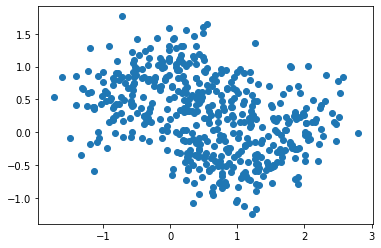

In [2]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])
plt.show()

In [3]:
#Criação do objeto com o algoritmo RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500,
                                 max_leaf_nodes=16,
                                 n_jobs=-1)

In [4]:
#Criação do modelo
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter='random', max_leaf_nodes=16),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=True,
    random_state=42)

2 Treinamento, Aplicação e Avaliação do Modelo


In [5]:
#2.1 Treinamento e realização de predições

#Treinamento do modelo
rnd_clf.fit(X_train, y_train)

#Predições
y_pred_rf = rnd_clf.predict(X_test)

#Conferência dos resultados
y_pred_rf

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)

In [7]:
#2.2 Avaliação dos resultados do modelo treinado
#Geração do relatório de avaliação da classificação
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

bag_clf.fit(X_train, y_train)

y_pred_bag = bag_clf.predict(X_test)
print(classification_report(y_test, y_pred_bag))


              precision    recall  f1-score   support

           0       0.87      0.95      0.91        61
           1       0.95      0.86      0.90        64

    accuracy                           0.90       125
   macro avg       0.91      0.91      0.90       125
weighted avg       0.91      0.90      0.90       125

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        61
           1       0.97      0.88      0.92        64

    accuracy                           0.92       125
   macro avg       0.92      0.92      0.92       125
weighted avg       0.92      0.92      0.92       125



In [6]:
#3 Avaliação de importância de características
# É possível usar uma random forest para avaliar o 
# peso das características. 
# O código abaixo realiza esta tarefa

#Carga dos dados de exemplo
from sklearn.datasets import load_iris
iris = load_iris()
#Criação e treinamento do modelo
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])

for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
  print(name, score)
  

sepal length (cm) 0.09078049244850887
sepal width (cm) 0.025479312695594544
petal length (cm) 0.4191741347143035
petal width (cm) 0.4645660601415932
